In [47]:
from scipy.integrate import odeint
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import scipy as sc

In [48]:
# Parameters

An = 155.32
A = 3.5/1000
f = 2.6
w = 2*np.pi*f
B = 36332.07
gama = 36332.07
n = 2
tf = 60
alpha_a = 1921.141
alpha_b = 5882.51
k0 = 1940.405
c1a = 2089.263
c1b = 14384.918
V = 5
f0 = 0
x0 = 0
k1 = 1.751268
c0a = 651.4718
c0b = 1043.7559
fac = 1

def x(t):
    x = A*np.sin(w*t)
    return x
def dx(t):
    dx = A*w*np.cos(w*t)
    return(dx)

In [49]:
t = np.linspace(0, 1, 1001)
def vvolt(t, VV):
    return -tf*(VV-V)

VV0 = 0

sol_VV = odeint(vvolt, y0=VV0, t=t, tfirst=True)

V_dot = sol_VV.T[0]
V_dot

array([0.        , 0.29117735, 0.56539783, ..., 5.        , 5.        ,
       5.        ])

In [50]:
def c1f(VV):
    return c1a+c1b*VV

def c0f(VV):
    return c0a+c0b*VV

def alpf(VV):
    return alpha_a + alpha_b*VV

c1 = c1f(V_dot)
c0 = c0f(V_dot)
alpha = alpf(V_dot)
c1

array([ 2089.263     ,  6277.82525069, 10222.4644119 , ...,
       74013.85300056, 74013.85300056, 74013.85300055])

In [51]:
resp = []
for i in range(len(t)):
    c1n = c1[i]
    c0n = c0[i]
    alphan = alpha[i]
    
    
    def dSdt(S, t):

        y, z = S

        dy = (1/(c1n+c0n))*((alphan*z)+(c0n*dx(t))+(k0*(x(t)-(y))))
        dz = (-gama*np.abs(dx(t)-dy)*z*((np.abs(z)**np.array([n-1])))) - (B*(dx(t)-dy)*((np.abs(z)**np.array([n])))) + (An*(dx(t)-dy))
        var_s = [dy,dz]
        
        return var_s
    
    y0 = 0
    z0 = 0
    S_0 = ([y0, z0])
    
    sol = odeint(dSdt, y0=S_0, t=t)
    
    resp.append(sol.T)

In [52]:
len(c1)

1001

In [53]:
yl = []
zl = []
for i in range(len(t)):
    yl.append(resp[i][0][i])
    zl.append(resp[i][1][i])

In [54]:
dy = (np.ones_like(c1)/(c1+c0))*((alpha*zl)+(c0*dx(t))+(k0*(x(t)-(yl))))
dy

array([ 0.01359095,  0.01125746,  0.012747  , ..., -0.0216518 ,
       -0.02161345, -0.02157416])

In [55]:
Fd = c1*(dy) + k1*(x(t)-x0) - f0
max(Fd)

1653.3571643008884

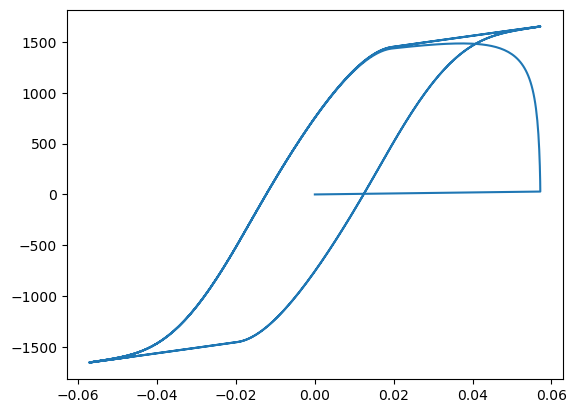

In [56]:
plt.plot(np.insert(dx(t),0,0), np.insert(Fd*fac,0,0))

In [57]:
np.insert(Fd*fac,0,Fd[0])

array([   28.39507244,    28.39507244,    70.67248268, ...,
       -1602.53658511, -1599.69794025, -1596.79049567])

In [58]:
def c1f2(t):
    return c1f(t)

def c0f2(t):
    return c0f(t)

def aplf2(t):
    return alpf(t)



rest = []

for i in range(len(t)):
    def dSdt(S, t, VV2):

        y, z = S

        dy = (1/(c1f2(VV2)+c0f2(VV2)))*((aplf2(VV2)*z)+(c0f2(VV2)*dx(t))+(k0*(x(t)-(y))))
        dz = (-gama*np.abs(dx(t)-dy)*z*((np.abs(z)**np.array([n-1])))) - (B*(dx(t)-dy)*((np.abs(z)**np.array([n])))) + (An*(dx(t)-dy))
        var_s = [dy,dz]
        
        return var_s

    y0 = 0
    z0 = 0
    S_0 = ([y0, z0])

    param_V = (V_dot[i])

    sol = odeint(dSdt, y0=S_0, t=t, args=(param_V,))

    rest.append(sol.T)


In [59]:
yl = []
zl = []
for i in range(len(t)):
    yl.append(rest[i][0][i])
    zl.append(rest[i][1][i])

In [60]:
dy = (np.ones_like(c1)/(c1+c0))*((alpha*zl)+(c0*dx(t))+(k0*(x(t)-(yl))))
dy

array([ 0.01359095,  0.01125746,  0.012747  , ..., -0.0216518 ,
       -0.02161345, -0.02157416])

In [61]:
Fd = c1*(dy) + k1*(x(t)-x0) - f0
max(Fd)

1653.3571643008884

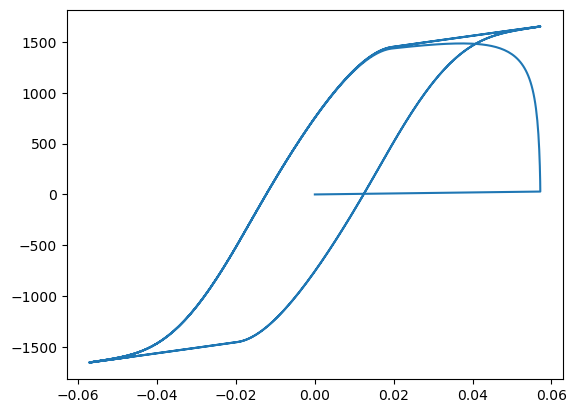

In [62]:
plt.plot(np.insert(dx(t),0,0), np.insert(Fd*fac,0,0))

In [63]:
pa = (V_dot,)
type(pa)
len(pa)

1